<a href="https://colab.research.google.com/github/BrianKipngeno/Autolib-Car-Sharing-Week-4-IP/blob/main/Brian_Kipngeno_week4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # AUTOLIB CAR SHARING SERVICE

# Introduction: Background information

Autolib was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on 31 July 2018. It was operated by the Bolloré industry and complemented the city's bike sharing system, Velib', which was set up in 2007. The Autolib' service maintained a fleet of all-electric Bolloré Bluecars or the utility cars Utilib and Utilib 14. for public use on a paid subscription basis, employing a citywide network of parking and charging stations.

##  Specifying the Data Analytic Question: PROBLEM STATEMENT

We are tasked to investigate a claim about  the blue cars from the autilob dataset. We wil study the car sharing service of the blue cars during weekends to test the following hypothesis.

 **Null hypothesis**: the mean of blue cars taken 
is equal to that of the blue cars returned


 **Alternative hypothesis**:  the mean of blue cars taken is not equal to that of the blue cars returned.

 Our objectives for this experiment are:
 
  1) Find and deal with outliers, anomalies, and missing data within the dataset.

  2)Plot appropriate univariate and bivariate summaries recording our observations.

  3)Implement the solution by performing hypothesis testing.

  4)Construct a confidence interval 


# Metric of success

Completing on a hypothesis test giving a 95% confidence interval of the problem statement.

#  Relevance of the data

The data that was used for this research was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network.

# Importing libraries

In [2]:
# We will begin by importing the libraries that we need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


# Checking the data.


In [3]:
description = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
#loading the dataset
 
autolib_data = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
autolib_data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [5]:
#  Previewing the top of our dataset
autolib_data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
#  Previewing the bottom of our dataset
autolib_data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# check the shape of the data
autolib_data.shape 


(16085, 13)

Our dataset has 16085 records and 13 columns

# External Data Source Validation

# Tidying the Dataset

In [8]:
#Inspecting the data
print(autolib_data.describe())
print(" ")
print("*************************************")
print(" ")
print(autolib_data.info())

        Postal code  n_daily_data_points  ...  Slots_freed_sum  Slots_taken_sum
count  16085.000000         16085.000000  ...     16085.000000     16085.000000
mean   88791.293876          1431.330619  ...        22.629033        22.629282
std     7647.342000            33.212050  ...        52.120263        52.146030
min    75001.000000          1174.000000  ...         0.000000         0.000000
25%    91330.000000          1439.000000  ...         0.000000         0.000000
50%    92340.000000          1440.000000  ...         0.000000         0.000000
75%    93400.000000          1440.000000  ...         5.000000         5.000000
max    95880.000000          1440.000000  ...       360.000000       359.000000

[8 rows x 11 columns]
 
*************************************
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0

In [9]:
# check the columns that are in our dataset
autolib_data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [10]:
# check for unique values in our financial dataset
autolib_data.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [11]:
#  checking this for specific columns
autolib_data['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [12]:
#  checking this for specific columns
autolib_data['date'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [13]:
#  checking this for specific columns
autolib_data['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [14]:
#  checking this for specific columns
autolib_data['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [15]:
#  checking this for specific columns
autolib_data['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [16]:
#  checking this for specific columns
autolib_data['BlueCars_taken_sum'].unique()

array([ 110,   98,  138,  104,  114,  187,  180,   84,   81,   88,  125,
        126,  224,  193,  107,  116,  118,  122,  130,  217,  143,  123,
        112,  108,  145,  216,  190,   83,  103,  146,  199,  186,  121,
        113,  109,  207,  160,  115,   94,   99,  119,  176,  157,   85,
        100,  135,    8,   92,  127,  136,  192,  168,  102,  134,  197,
        173,  131,  196,  150,  156,  231,  105,  219,  179,  124,  188,
        139,   97,  120,  159,  147,  151,  129,  152,  142,  141,  202,
        175,   96,  133,  254,  137,  185,  203,    6,  166,  165,  243,
        264,  213,  164,  163,  191,  276,  210,  183,  148,  270,  128,
        280,  178,  153,  158,  259,  161,  240,   12,  181,  140,  263,
        167,  177,  250,  208,  171,  266,  155,  247,  154,  184,  293,
        228,  182,  144,  218,  162,  239,  200,  170,  174,  172,  245,
          5,  195,  237,  331,  283,  212,  211,  380,  356,  233,  220,
        238,  384,  313,  229,  221,  201,  350,  3

In [ ]:
#  checking this for specific columns
autolib_data['BlueCars_returned_sum'].unique()

array([ 103,   94,  139,  104,  117,  185,  180,   83,   84,   85,  125,
        127,  223,  193,  107,  116,  118,  122,  130,  217,  150,  113,
        146,  218,  189,   81,  110,  147,  204,  121,   99,  112,  109,
        207,  165,  111,   93,  119,  176,  158,   86,   98,  135,    9,
         91,  131,  137,  138,  208,  177,  124,  101,  145,  203,  169,
         96,  136,  142,  196,  154,  100,   97,  144,  128,  179,  151,
        115,  232,  105,  219,  143,  190,  102,  159,  155,  156,  120,
        141,  201,  133,  253,  199,   95,  108,  188,  126,  206,  174,
          7,  244,  197,  153,  264,  148,  164,  277,  213,  149,  175,
        270,  198,  280,  161,  178,  152,  160,  257,  205,  240,  123,
        157,   12,  265,  186,  173,  140,  171,  167,  255,  209,  170,
        266,  248,  243,  183,  292,  222,  134,  236,  132,  181,  172,
        184,  168,  162,  237,  163,  233,  202,  283,  192,  252,  211,
          6,  250,  187,  229,  249,  338,  293,  2

In [ ]:
#  checking this for specific columns
autolib_data['Utilib_taken_sum'].unique()

array([ 3,  1,  0,  2,  6,  5,  4,  7,  8,  9, 11, 17, 10, 13, 18, 12, 15,
       16, 21, 19, 14, 34, 31, 23, 20, 22, 24, 29, 25, 28, 26, 27, 46, 32,
       30, 43, 38, 37, 40, 45, 54, 36, 35, 39, 42, 33, 41, 47])

In [ ]:
#  checking this for specific columns
autolib_data['Utilib_returned_sum'].unique()

array([ 2,  1,  0,  3,  6,  5,  4,  7,  8,  9, 11, 17, 10, 13, 18, 14, 15,
       12, 21, 20, 16, 19, 35, 32, 23, 22, 24, 25, 27, 26, 30, 49, 28, 31,
       29, 43, 38, 39, 36, 34, 47, 45, 33, 58, 41, 37, 42, 40, 44])

In [ ]:
#  checking this for specific columns
autolib_data['Utilib_14_taken_sum'].unique()

array([ 10,   8,   2,   9,   6,   7,   4,  11,  13,  12,  15,  25,   5,
        14,   3,  17,  16,   0,   1,  21,  18,  19,  22,  20,  27,  23,
        24,  29,  26,  28,  30,  33,  41,  36,  34,  40,  50,  45,  32,
        31,  35,  37,  42,  38,  48,  47,  52,  39,  53,  43,  56,  51,
        75,  49,  55,  44,  46,  54,  57,  61,  60,  70,  58,  68,  62,
        64,  59,  66,  63,  65,  72,  89,  82,  69,  71,  79,  84,  73,
        81,  80,  67,  90, 100,  91,  85,  74,  76,  94,  78,  95,  87,
        93])

In [ ]:
#  checking this for specific columns
autolib_data['Utilib_14_returned_sum'].unique()

array([  9,   8,   2,   6,  10,   4,  11,  13,  12,  15,   7,  25,   5,
        14,   3,  17,  16,   0,   1,  21,  18,  19,  20,  22,  27,  23,
        24,  29,  34,  41,  28,  35,  32,  30,  26,  33,  43,  50,  44,
        31,  36,  40,  38,  48,  37,  47,  53,  45,  39,  51,  54,  52,
        46,  74,  42,  57,  49,  60,  63,  61,  55,  66,  59,  58,  67,
        68,  62,  64,  71,  56,  69,  84,  70,  72,  86,  76,  80,  89,
        73,  94,  79,  65,  93,  78,  75,  77,  82,  85,  88, 101,  87,
        90,  96,  83])

In [ ]:
#  checking this for specific columns
autolib_data['Slots_freed_sum'].unique()

array([ 22,  23,  27,  25,  18,  38,  34,  14,  15,  11,  19,  16,  21,
        17,  41,  24,  20,  35,  36,  32,  13,  28,  12,  26,   0,  48,
        30,  29,  31,  47,  33,  40,  37,   9,  10,  43,  44,  49,  39,
        42,  45,  51,  46,  59,  64,  56,  52,   1,  50,  95,  84,  83,
        81,  58,  61,  67, 101,  86,  63,  97,  60,  57,  65,  80,  79,
        77,  54,  85,  75,  73,  55,   3,  62,  82,  71,  69,  74,  89,
        91, 109,  70,  76,  72,  68,  78,  53,  66,  87,   2,   5, 120,
       111,  92, 110,  88, 103, 142, 115, 105, 113, 121,  96,  90, 134,
       140, 130,  94,  99, 128, 100, 129,  98, 118, 106, 119, 117, 102,
       107,  93, 135, 104, 122, 133, 108, 112, 116, 123, 136, 126,   6,
       114, 132, 177, 167, 125, 124, 131, 143, 139, 137, 153, 180, 157,
       162, 152, 151, 149, 156, 145, 173, 147, 211, 127, 141, 161, 144,
       163, 138, 171, 158, 148, 168, 154, 166, 150, 170, 146, 165, 178,
       174, 175, 176, 181, 190, 160, 184, 205, 253, 252, 155, 19

In [ ]:
#  checking this for specific columns
autolib_data['Slots_taken_sum'].unique()

array([ 20,  22,  27,  21,  35,  34,  15,  13,  38,  19,  39,  25,  14,
         9,  37,  36,  30,  16,  11,  28,  33,  18,  12,   0,  31,  23,
        26,  50,  17,  40,  24,  48,  32,   8,  29,  42,  43,  49,  45,
        41,  44,  52,  59,  46,  65,  47,  57,  51,   1,  97,  87,  54,
        84,  83,  60,  69, 103,  58,  62,  92,  67,  78,  82,  77,  53,
        88,  72,  66,  99,  64,  55,  75, 113,  63,  74,  71,  89,  68,
        81,  73,  70,  61,  79,  56,  76,  86,   2, 118, 108, 107, 144,
       114,  93, 105, 106, 115, 122,  90,  80,  98,  85, 139, 136, 128,
        94, 126,  95,   4, 130, 102,  96, 129, 138, 111, 124, 101, 109,
       116, 110, 134,  91, 119, 137, 100,   3, 104, 112,   6, 177, 125,
       120, 123, 131, 135, 140, 132, 155, 182, 154, 164, 121, 151, 157,
       147, 117, 153, 160, 141, 172, 161,   5, 213, 145, 143, 162, 127,
       148, 169, 149, 171, 167, 163, 166, 133, 158, 159, 150, 174, 173,
       178, 152,   7, 176, 179, 165, 180, 142, 188, 185, 183,  1

In [ ]:
# Checking for null values

autolib_data.isnull().sum()

# Most of our records have null values, though not as many from a total records of 23,524

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There is no missing data from our dataset


In [ ]:
autolib_data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

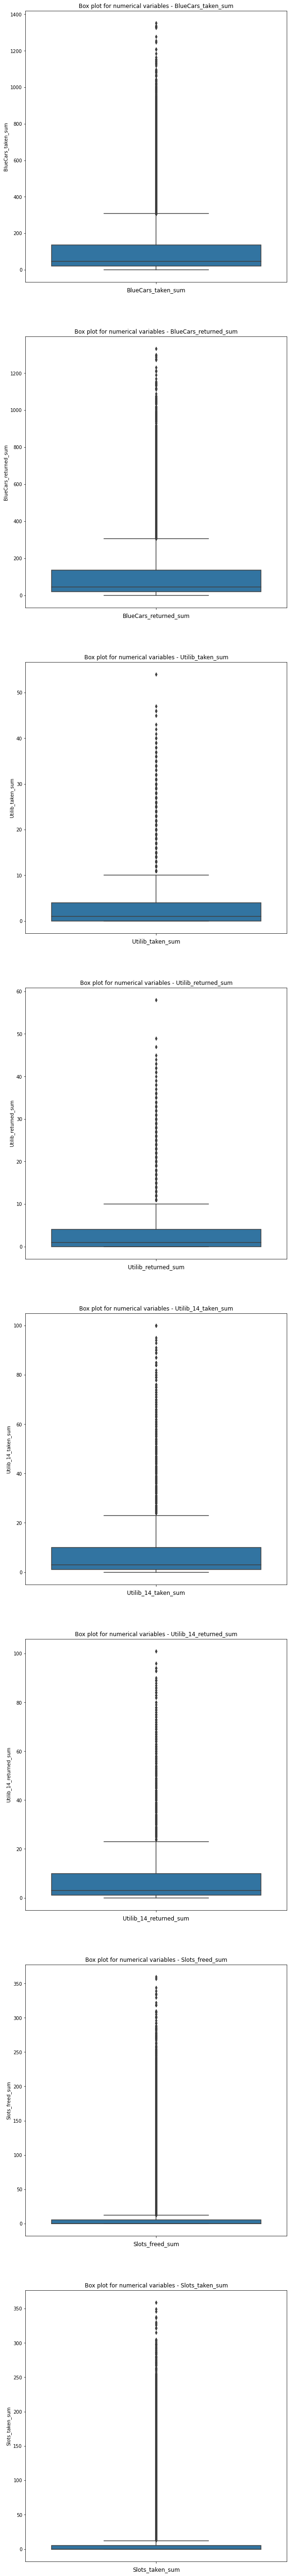

In [22]:
# checking for outliers 

col_names= ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=autolib_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

We retain the outliers since  can they capture valuable information that is part of our research

In [ ]:
autolib_data.shape

(16085, 13)

#          Exploratory Data Analysis.






### a) univarite analysis

In [ ]:
autolib_data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [18]:
# MEAN
#
# Lets calculate the average of the data in the numerical attributes

print('Bluecars taken mean    : ', autolib_data.BlueCars_taken_sum.mean())
print('Bluecars returned mean : ', autolib_data.BlueCars_returned_sum.mean())
print('Utilib taken mean      : ', autolib_data.Utilib_taken_sum.mean())
print('Utilib returned mean   : ', autolib_data.Utilib_returned_sum.mean())
print('Utilib 14 taken mean   : ', autolib_data.Utilib_14_taken_sum.mean())
print('Utilib 14 returned mean : ', autolib_data.Utilib_14_returned_sum.mean())
print('slots  freed mean      : ', autolib_data.Slots_freed_sum.mean())
print('slots  taken mean      : ', autolib_data.Slots_taken_sum.mean())

Bluecars taken mean    :  125.92695057506994
Bluecars returned mean :  125.912713708424
Utilib taken mean      :  3.69829033260802
Utilib returned mean   :  3.6990985390115014
Utilib 14 taken mean   :  8.600559527510102
Utilib 14 returned mean :  8.599191793596518
slots  freed mean      :  22.62903326080199
slots  taken mean      :  22.629281939695367


In [19]:
# Finding the mean
#
# Lets calculate the average of the data in the numerical attributes
autolib_data[['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']].mean()

BlueCars_taken_sum        125.926951
BlueCars_returned_sum     125.912714
Utilib_taken_sum            3.698290
Utilib_returned_sum         3.699099
Utilib_14_taken_sum         8.600560
Utilib_14_returned_sum      8.599192
Slots_freed_sum            22.629033
Slots_taken_sum            22.629282
dtype: float64

In [20]:
# Lets calculate the mode of the data in the numerical attributes
autolib_data[['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']].mode()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,12,13,0,0,0,0,0,0


In [21]:
# Lets calculate the average of the data in the numerical attributes
autolib_data[['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']].median()

BlueCars_taken_sum        46.0
BlueCars_returned_sum     46.0
Utilib_taken_sum           1.0
Utilib_returned_sum        1.0
Utilib_14_taken_sum        3.0
Utilib_14_returned_sum     3.0
Slots_freed_sum            0.0
Slots_taken_sum            0.0
dtype: float64

In [23]:
# Calculating standard deviation using the std() function for all numeric variables
#
# Finding the standard deviation
for column in col_names:
  print('\n')
  print(column + ', Standard deviation: '+ str(autolib_data[column].std()))
  print(column + ', Variance: '+ str(autolib_data[column].var()))
  print(column + ', Skewness: '+ str(autolib_data[column].skew()))
  print(column + ', Kurtosis: '+ str(autolib_data[column].kurt()))



BlueCars_taken_sum, Standard deviation: 185.42657876727893
BlueCars_taken_sum, Variance: 34383.01611333789
BlueCars_taken_sum, Skewness: 2.4063548974959086
BlueCars_taken_sum, Kurtosis: 6.172692305510042


BlueCars_returned_sum, Standard deviation: 185.50153480148427
BlueCars_returned_sum, Variance: 34410.819413706275
BlueCars_returned_sum, Skewness: 2.412084978838923
BlueCars_returned_sum, Kurtosis: 6.1862880957582345


Utilib_taken_sum, Standard deviation: 5.815057779367249
Utilib_taken_sum, Variance: 33.81489697737956
Utilib_taken_sum, Skewness: 2.5568719194754777
Utilib_taken_sum, Kurtosis: 7.702361895243428


Utilib_returned_sum, Standard deviation: 5.824634228651658
Utilib_returned_sum, Variance: 33.9263638975805
Utilib_returned_sum, Skewness: 2.57866477971619
Utilib_returned_sum, Kurtosis: 7.93635700780893


Utilib_14_taken_sum, Standard deviation: 12.870098297095637
Utilib_14_taken_sum, Variance: 165.63943017690403
Utilib_14_taken_sum, Skewness: 2.5109244534822923
Utilib_14_t

Standard deviations show how data is spread out from mean.

The variables are positively skewed

the distribution has heavier tails 

In [ ]:
autolib_data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


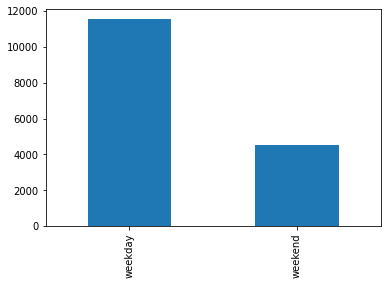

In [ ]:
#visualization for weekdays and weekends
autolib_data['day_type'].value_counts().plot(kind = 'bar');

autolib was busier on weekdays

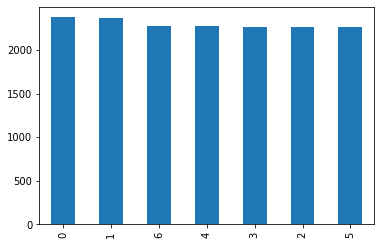

In [ ]:
#visualization on day of week
autolib_data['dayOfWeek'].value_counts().plot(kind = 'bar');

Monday was the busiest day of the week for autolib

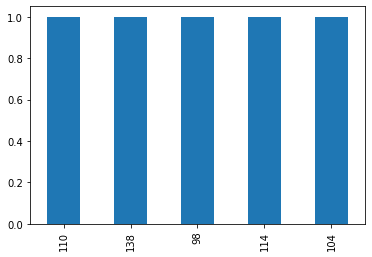

In [ ]:
#visualization on day of week
autolib_data['BlueCars_taken_sum'].head().value_counts().plot(kind = 'bar');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

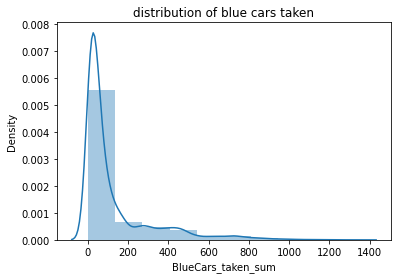

In [ ]:
# bluecars taken
sns.distplot(autolib_data['BlueCars_taken_sum'], bins=10);
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

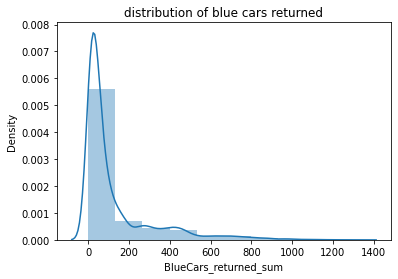

In [ ]:
# bluecars returned
sns.distplot(autolib_data['BlueCars_returned_sum'], bins=10);
plt.title('distribution of blue cars returned')

### b) Bivariate analysis

Weekdays = 11544
Weekends = 4541
Proportion of Weekdays  = 71.77%
Proportion of Weekends  = 28.23%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


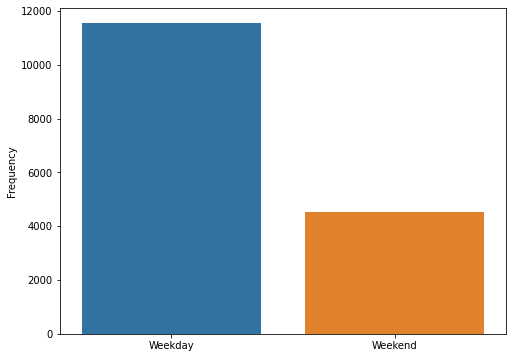

In [ ]:
#Number of cars taken during the weekdays against During the weekends
a = autolib_data[autolib_data["day_type"] == 'weekday'].shape[0]
b = autolib_data[autolib_data["day_type"] == 'weekend'].shape[0]
print(f"Weekdays = {a}")
print(f"Weekends = {b}")
print(f"Proportion of Weekdays  = {(a / len(autolib_data['day_type'])) * 100:.2f}%")
print(f"Proportion of Weekends  = {(b / len(autolib_data['day_type'])) * 100:.2f}%")                                                      
plt.figure(figsize=(8, 6))
sns.countplot(autolib_data["day_type"])
plt.xticks((0, 1), ["Weekday", "Weekend"])
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("", y=1, fontdict={"fontsize": 20});

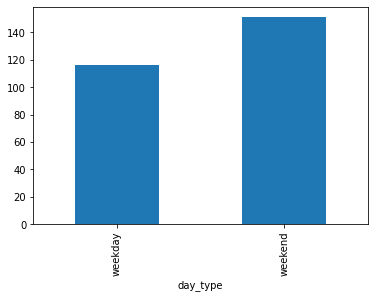

In [ ]:
#average Number of bluecars taken during the weekdays vs During the weekends
autolib_data.groupby('day_type')['BlueCars_taken_sum'].mean().plot(kind='bar')

Blue cars were majorly taken during the weekdays.

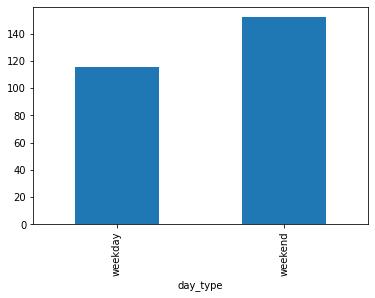

In [ ]:
#average Number of bluecars returned during the weekdays vs During the weekends
autolib_data.groupby('day_type')['BlueCars_returned_sum'].mean().plot(kind='bar')


Most vehicles were returned during the weekdays also.

Text(0.5, 1.0, 'bluecars picked for the weekend')

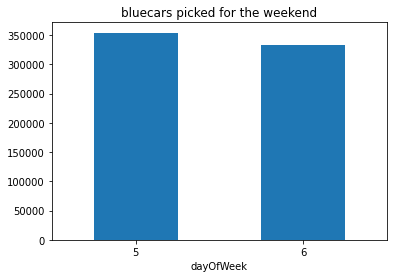

In [ ]:
# Compare blue car pickup behaviour based on weekends

autolib_data[autolib_data['day_type'] == 'weekend'].groupby('dayOfWeek')['BlueCars_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('bluecars picked for the weekend')

More  blue cars were picked on saturday compared to Sunday.

Text(0.5, 1.0, 'bluecars returned on weekend')

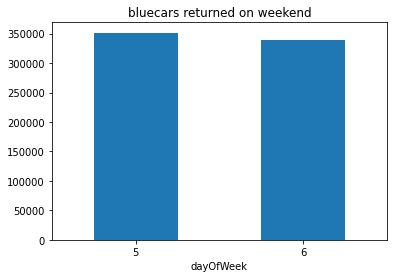

In [ ]:
# Compare blue car dropoff behaviour based on weekends

autolib_data[autolib_data['day_type'] == 'weekend'].groupby('dayOfWeek')['BlueCars_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('bluecars returned on weekend')

Saturday also had more cars being dropped off compared to Sunday

In [ ]:
# Using the corr() function to find the coefficient of correlation
#
corr_df = autolib_data.corr() # This will return a table of the degree of correlation of each variable against all other variables.
corr_df

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


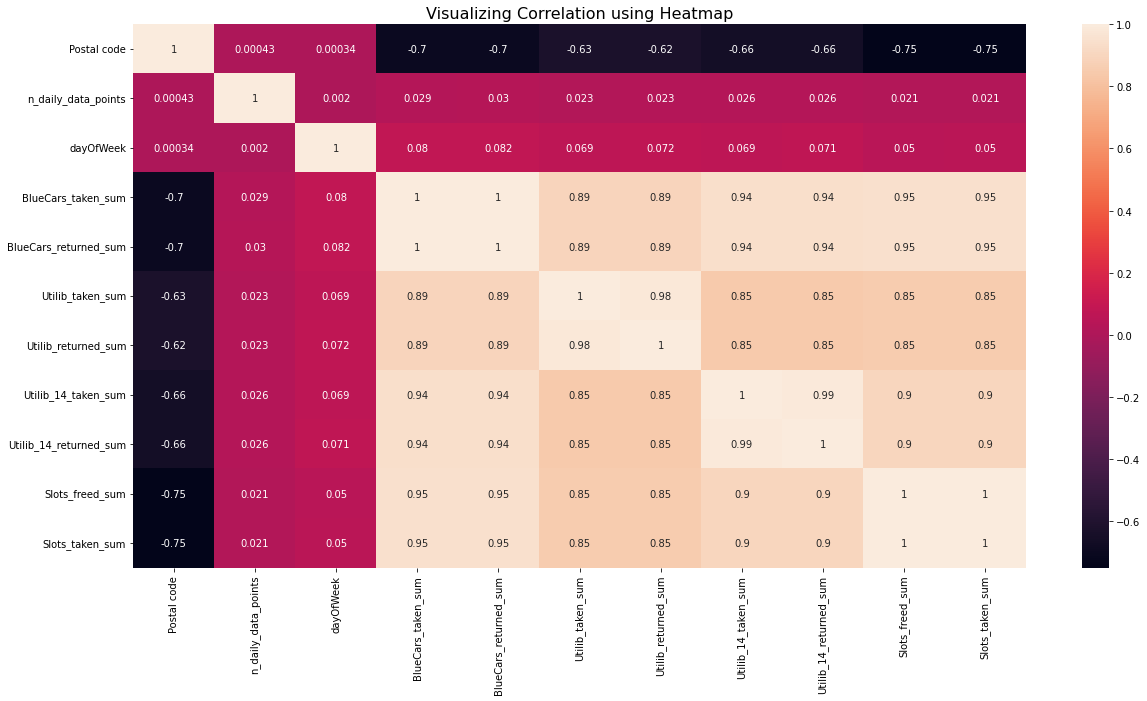

In [ ]:
#Heatmap
plt.subplots(figsize = (20,10))
sns.heatmap(corr_df, annot = True)
plt.title('Visualizing Correlation using Heatmap', fontsize = 16, color = 'black' )


plt.show()

The heatmap shows the correlation among the variales in the data

# Implementing the solution: Hypothesis Testing

 **Null hypothesis**: the mean of blue cars taken 
is equal to that of the blue cars returned


 **Alternative hypothesis**:  the mean of blue cars taken is not equal to that of the blue cars returned.

In [ ]:
autolib_data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
autolib_data.drop(['date', 'n_daily_data_points', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace=True)
autolib_data

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


Information about blue cars was filtered in line with nour research question

In [ ]:
# Extract day type data
autolib = autolib_data[autolib_data.day_type == 'weekend']
autolib.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,5,weekend,187,185
6,75001,6,weekend,180,180
12,75001,5,weekend,224,223
13,75001,6,weekend,193,193
19,75001,5,weekend,217,217


Weekend data was extracted which is the period of our study

In [ ]:
autolib.shape

(4541, 5)

In [ ]:
autolib.drop(['day_type'], axis=1, inplace=True)
autolib

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,5,187,185
6,75001,6,180,180
12,75001,5,224,223
13,75001,6,193,193
19,75001,5,217,217
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [ ]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

### Stratified Sampling.


In [ ]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import time                   
import warnings             
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
from sklearn.mixture import GaussianMixture 
import os                    
import sys  

In [ ]:
# Stratified sample
autolib_sample = autolib.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.7))
autolib_sample

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
14352,94220,5,53,49
7490,92310,5,64,64
12101,93400,5,159,170
6642,92240,5,117,107
324,75003,5,380,379
...,...,...,...,...
1051,75007,6,238,239
360,75003,6,277,290
6986,92260,6,13,24
2984,75020,6,586,624


A stratified sample comprising of 70% of the data was used to provide more accurate mean values

In [ ]:
# testing for normality for Bluecars Taken 
from scipy.stats import shapiro 
stat, p = shapiro(autolib_sample['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.672, p=0.000
Sample does not look Gaussian


In [ ]:
# testing for normality for Bluecars returned

stat, p = shapiro(autolib_sample['BlueCars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.671, p=0.000
Sample does not look Gaussian


In [ ]:
#Calcuklating the p value using s test
from statsmodels.stats.weightstats import ztest as ztest
ztest,pval = ztest(autolib_sample['BlueCars_taken_sum'],autolib_sample['BlueCars_returned_sum'])

print("This is our p-value", pval)
print("This is value of the ztest", ztest)
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We fail to reject the Null Hypothesis")

This is our p-value 0.8481097406849015
This is value of the ztest -0.19153081478438222
We fail to reject the Null Hypothesis


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Point Estimation

In [ ]:
# Population Mean for BlueCars
# pop mean
a = autolib['BlueCars_taken_sum'].mean()
a

# The sample mean
b = autolib_sample['BlueCars_taken_sum'].mean()
b

#point estimator
a-b

-1.9835397859452257

our estimator underestimates the true mean by 0.0006. We can conclude that we can get a fairly accurate estimate of a large population from smaller subset.

### Confidence Interval

In [ ]:
# Confidence level for Blue Cars

#sample size
sample_size = len(autolib_sample['BlueCars_taken_sum'])
sample_size

#standard error
std_error = autolib_sample['BlueCars_taken_sum'].std()/np.sqrt(sample_size)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=b, scale=std_error)

(145.4251659011278, 160.7220502045658)

We can be 95% certain that the population mean data is between 143.79 and 159.11

# Summary

No missing values or duplicated records in our data.

Outliers were retained since they are important for the study.

The numerical variables to not follow a normal distribution.

High correlation between numerical variables.

Stratified sample was used for greater precision.



# Conclussion

We fail to reject the null hypothesis becase there is not sufficient evidence to prove that the average means of the bluecars taken and returned are not equal.